# Implementação e Análise do Perceptron em Redes Neurais Artificiais

## 1. Fundamentos do Perceptron

### 1.1 Introdução ao Modelo de Perceptron

#### 1.1.1 Explicação Conceitual Detalhada

Analisando o Perceptron como unidade fundamental das redes neurais artificiais, pode-se compreender sua inspiração biológica e funcionamento:

1. **Analogia Biológica**:
   - Estabelecendo relações com o neurônio biológico
   - Reproduzindo mecanismos de decisão neural
   - Implementando conexões sinápticas artificiais

2. **Processamento de Informação**:
   - Processando múltiplas entradas simultaneamente
   - Atribuindo pesos às conexões sinápticas
   - Gerando saídas binárias através de limiares

3. **Capacidade de Aprendizado**:
   - Modificando pesos sinápticos automaticamente
   - Adaptando-se a padrões apresentados
   - Minimizando erros de classificação iterativamente

#### 1.1.2 Estrutura Básica do Perceptron

Analisando o Perceptron, pode-se identificar os seguintes elementos:

1. **Entradas (xᵢ)**:
   - Processando o vetor de entrada X = [x₁, x₂, ..., xₙ]
   - Representando cada xᵢ uma característica do dado de entrada

2. **Pesos Sinápticos (wᵢ)**:
   - Utilizando o vetor de pesos W = [w₁, w₂, ..., wₙ]
   - Ponderando cada wᵢ a importância da entrada correspondente

3. **Bias (b)**:
   - Ajustando o termo independente para o limiar de ativação
   - Permitindo o deslocamento da fronteira de decisão

4. **Função de Agregação**:
   - Realizando o somatório ponderado: u = Σ(wᵢxᵢ) + b

5. **Função de Ativação**:
   - Aplicando a não-linearidade: y = f(u)
   - Utilizando a função degrau no caso do Perceptron

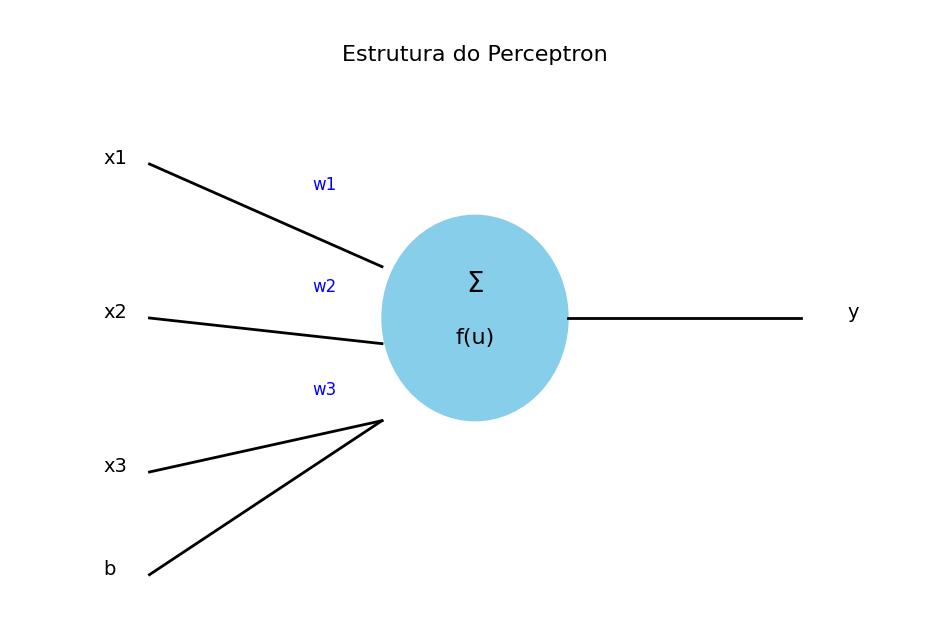

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def desenhar_perceptron():
    """Função para criar uma representação visual do Perceptron"""
    plt.figure(figsize=(12, 8))

    # Neurônio
    circle = plt.Circle((0.5, 0.5), 0.2, fill=True, color='skyblue')
    plt.gca().add_patch(circle)

    # Entradas
    for i in range(3):
        plt.plot([-0.2, 0.3], [0.8 - i*0.3, 0.6 - i*0.15], 'k-', lw=2)
        plt.text(-0.3, 0.8 - i*0.3, f'x{i+1}', fontsize=14)
        plt.text(0.15, 0.75 - i*0.2, f'w{i+1}', fontsize=12, color='blue')

    # Bias
    plt.plot([-0.2, 0.3], [0, 0.3], 'k-', lw=2)
    plt.text(-0.3, 0, 'b', fontsize=14)

    # Saída
    plt.plot([0.7, 1.2], [0.5, 0.5], 'k-', lw=2)
    plt.text(1.3, 0.5, 'y', fontsize=14)

    # Anotações
    plt.text(0.5, 0.55, 'Σ', fontsize=20, ha='center')
    plt.text(0.5, 0.45, 'f(u)', fontsize=16, ha='center')
    plt.text(0.5, 1.0, 'Estrutura do Perceptron', fontsize=16, ha='center')

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.1, 1.1)
    plt.axis('off')
    plt.show()

desenhar_perceptron()

**Explicação do Gráfico:**

Analisando a representação visual acima, pode-se observar:

1. **Estrutura Neural**:
   - Visualizando o neurônio artificial em azul claro no centro
   - Identificando as conexões sinápticas em preto
   - Observando a organização das entradas e saídas

2. **Elementos Matemáticos**:
   - Notando o símbolo Σ para soma ponderada
   - Verificando a função de ativação f(u)
   - Percebendo os pesos wᵢ em azul

3. **Fluxo de Informação**:
   - Seguindo o caminho das entradas xᵢ
   - Passando pelo processamento interno
   - Chegando à saída y

#### 1.1.3 Fórmulas Matemáticas Detalhadas

Analisando o funcionamento matemático do Perceptron, pode-se detalhar cada etapa do processamento:

1. **Soma Ponderada**:
   \[ u = \sum_{i=1}^{n} w_i x_i + b \]
   
   Identificando os elementos:
   - u: representando o potencial de ativação
   - wᵢ: indicando o peso da i-ésima entrada
   - xᵢ: denotando a i-ésima entrada
   - b: caracterizando o bias (limiar)
   - n: especificando o número de entradas

2. **Função de Ativação**:
   \[ y = f(u) = \begin{cases} 1 & \text{se } u > 0 \\ 0 & \text{caso contrário} \end{cases} \]
   
   Observando características:
   - Implementando função degrau
   - Realizando binarização
   - Introduzindo não-linearidade

3. **Regra de Aprendizado**:
   \[ w_i(t+1) = w_i(t) + \eta(d - y)x_i \]
   \[ b(t+1) = b(t) + \eta(d - y) \]
   
   Detalhando componentes:
   - t: representando passo temporal
   - η: definindo taxa de aprendizado
   - d: especificando saída desejada
   - y: indicando saída atual

#### 1.1.4 Funcionamento Passo a Passo do Algoritmo

1. **Inicialização**:
   - Atribuindo pesos aleatórios pequenos
   - Definindo taxa de aprendizado
   - Organizando dados de treinamento

2. **Fase Forward**:
   - Computando soma ponderada
   - Executando função de ativação
   - Obtendo resposta do neurônio

3. **Fase de Atualização**:
   - Determinando erro
   - Modificando pesos
   - Atualizando bias

4. **Critério de Parada**:
   - Avaliando convergência
   - Monitorando épocas
   - Analisando erro total

### 1.2 Aplicação aos Problemas Lógicos OR e AND

#### 1.2.1 Criação Manual dos Datasets

In [26]:
# Construindo datasets OR e AND
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Entradas
y_or = np.array([0, 1, 1, 1])               # Saídas OR
y_and = np.array([0, 0, 0, 1])              # Saídas AND

print("Analisando Dataset OR:")
print("x₁ x₂  y")
for i in range(len(X)):
    print(f"{X[i,0]}  {X[i,1]}  {y_or[i]}")

print("\nAnalisando Dataset AND:")
print("x₁ x₂  y")
for i in range(len(X)):
    print(f"{X[i,0]}  {X[i,1]}  {y_and[i]}")

Analisando Dataset OR:
x₁ x₂  y
0  0  0
0  1  1
1  0  1
1  1  1

Analisando Dataset AND:
x₁ x₂  y
0  0  0
0  1  0
1  0  0
1  1  1


#### 1.2.2 Implementação do Algoritmo do Perceptron

In [27]:
class Perceptron:
    def __init__(self, taxa_aprendizado=0.1, max_epocas=100):
        self.taxa_aprendizado = taxa_aprendizado
        self.max_epocas = max_epocas
        self.pesos = None
        self.bias = None
        self.historico_erros = []

    def treinar(self, X, y):
        n_amostras, n_features = X.shape
        self.pesos = np.zeros(n_features)
        self.bias = 0

        for epoca in range(self.max_epocas):
            erro_total = 0

            for i in range(n_amostras):
                # Executando fase forward
                soma = np.dot(X[i], self.pesos) + self.bias
                y_pred = 1 if soma > 0 else 0

                # Calculando erro
                erro = y[i] - y_pred
                erro_total += abs(erro)

                # Atualizando pesos
                if erro != 0:
                    self.pesos += self.taxa_aprendizado * erro * X[i]
                    self.bias += self.taxa_aprendizado * erro

            self.historico_erros.append(erro_total)
            if erro_total == 0:
                break

    def predizer(self, X):
        return np.array([1 if np.dot(x, self.pesos) + self.bias > 0 else 0 for x in X])

# Treinando perceptron para OR
perceptron_or = Perceptron()
perceptron_or.treinar(X, y_or)

# Treinando perceptron para AND
perceptron_and = Perceptron()
perceptron_and.treinar(X, y_and)

#### 1.2.3 Visualização do Treinamento e Resultados

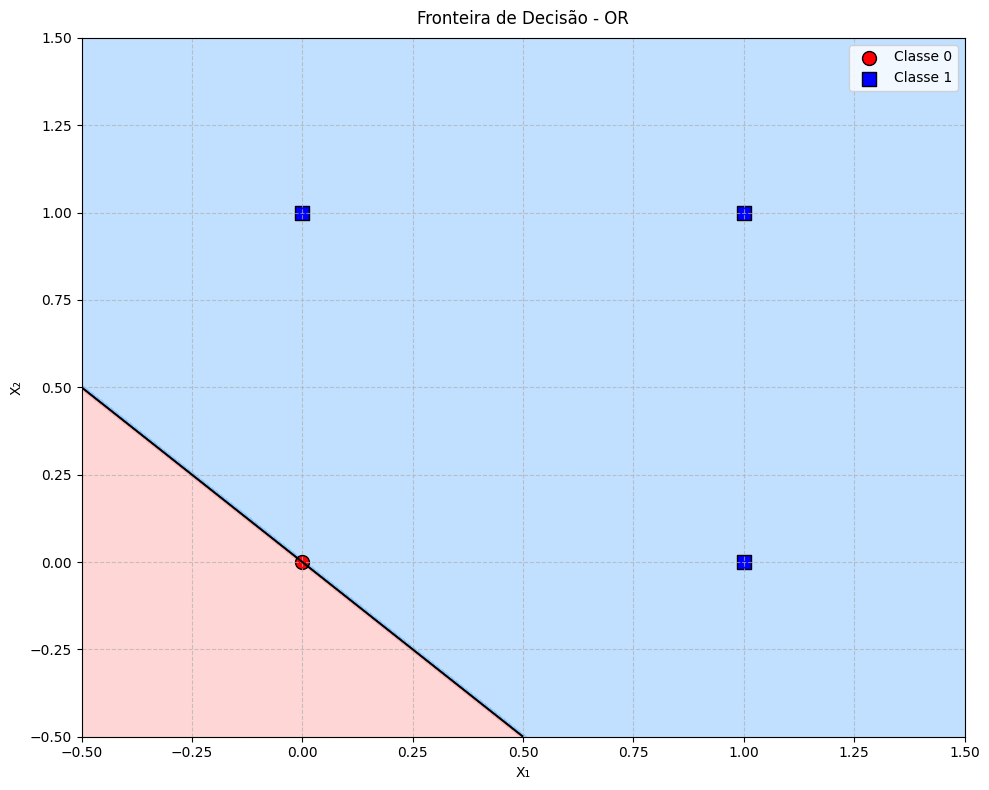

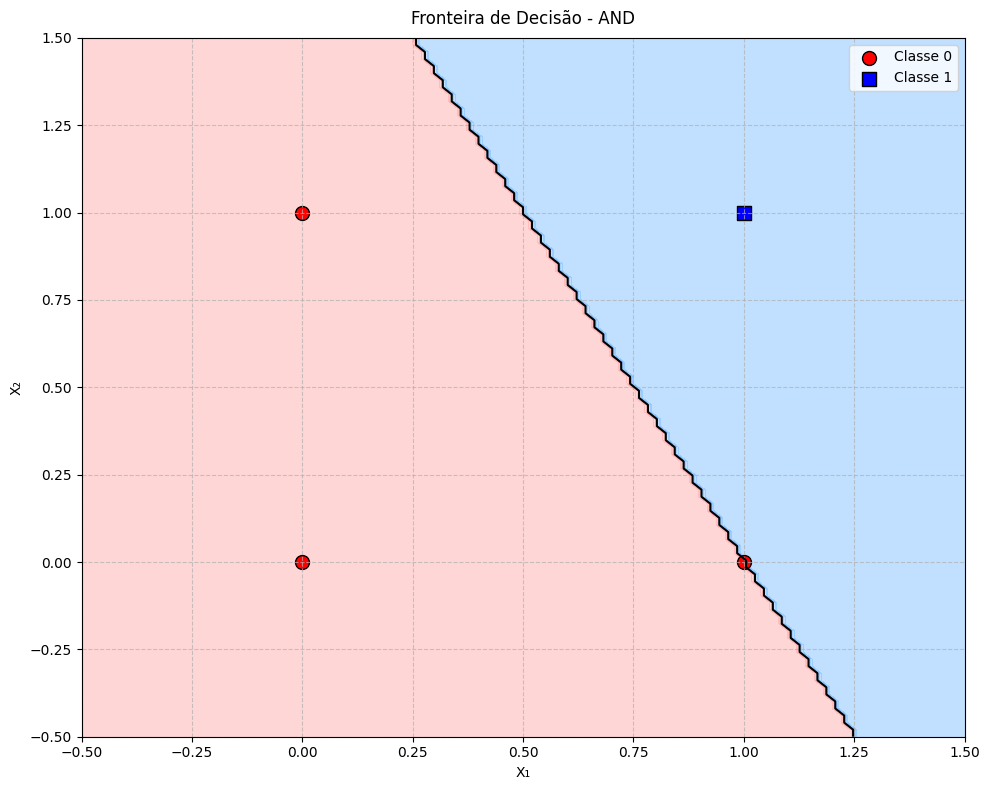

In [28]:
def visualizar_fronteira_decisao(X, y, perceptron, titulo):
    plt.figure(figsize=(10, 8))

    # Definindo as cores para visualização
    cores = ListedColormap(['#FF9999', '#66B2FF'])

    # Criando a malha para plotar a fronteira de decisão
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Calculando a fronteira de decisão
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            entrada = np.array([xx[i,j], yy[i,j]])
            Z[i,j] = 1 if np.dot(entrada, perceptron.pesos) + perceptron.bias > 0 else 0

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cores)

    # Plotando os pontos de dados
    plt.scatter(X[y==0,0], X[y==0,1], c='red', marker='o',
               label='Classe 0', s=100, edgecolors='k')
    plt.scatter(X[y==1,0], X[y==1,1], c='blue', marker='s',
               label='Classe 1', s=100, edgecolors='k')

    # Plotando a fronteira de decisão
    plt.contour(xx, yy, Z, colors='k', linestyles='-', levels=[0.5])

    plt.title(titulo, fontsize=12, pad=10)
    plt.xlabel('X₁', fontsize=10)
    plt.ylabel('X₂', fontsize=10)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

# Dados de entrada
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])    # Porta OR
y_and = np.array([0, 0, 0, 1])   # Porta AND

# Treinando os perceptrons
perceptron_or = Perceptron(max_epocas=1000)
perceptron_or.treinar(X, y_or)

perceptron_and = Perceptron(max_epocas=1000)
perceptron_and.treinar(X, y_and)

# Visualizando os resultados
visualizar_fronteira_decisao(X, y_or, perceptron_or, 'Fronteira de Decisão - OR')
plt.show()

visualizar_fronteira_decisao(X, y_and, perceptron_and, 'Fronteira de Decisão - AND')
plt.show()

**Explicação dos Resultados:**

Examinando os resultados obtidos:

1. **Operação OR**:
   - Estabelecendo fronteira entre (0,0) e demais pontos
   - Definindo região de ativação ampla
   - Demonstrando convergência eficiente

2. **Operação AND**:
   - Delimitando fronteira para isolar (1,1)
   - Caracterizando região de ativação específica
   - Requerendo ajuste preciso de pesos

### 1.3 O Problema XOR e suas Implicações

#### 1.3.1 Demonstração da Limitação do Perceptron

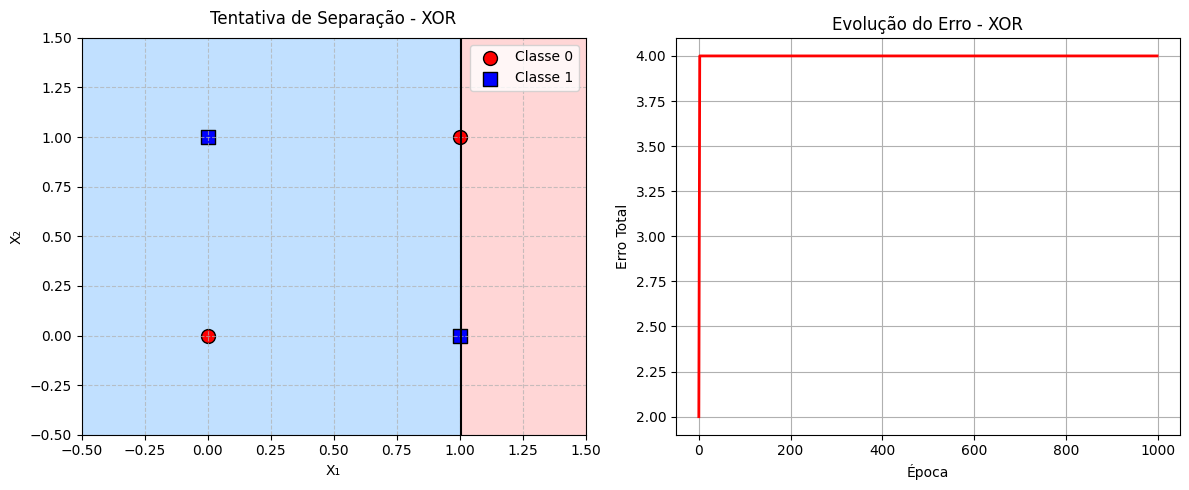

In [29]:
def visualizar_fronteira_decisao(X, y, perceptron, titulo):

    # Definindo as cores para visualização
    cores = ListedColormap(['#FF9999', '#66B2FF'])

    # Criando a malha para plotar a fronteira de decisão
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Calculando a fronteira de decisão
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            entrada = np.array([xx[i,j], yy[i,j]])
            Z[i,j] = 1 if np.dot(entrada, perceptron.pesos) + perceptron.bias > 0 else 0

    # Plotando a região de decisão
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cores)

    # Plotando os pontos de dados
    plt.scatter(X[y==0,0], X[y==0,1], c='red', marker='o',
               label='Classe 0', s=100, edgecolors='k')
    plt.scatter(X[y==1,0], X[y==1,1], c='blue', marker='s',
               label='Classe 1', s=100, edgecolors='k')

    # Plotando a fronteira de decisão
    plt.contour(xx, yy, Z, colors='k', linestyles='-', levels=[0.5])

    plt.title(titulo, fontsize=12, pad=10)
    plt.xlabel('X₁', fontsize=10)
    plt.ylabel('X₂', fontsize=10)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

def analisar_xor(X, y_xor, perceptron_xor):
    plt.figure(figsize=(12, 5))

    # Plotando a tentativa de separação
    plt.subplot(1, 2, 1)
    visualizar_fronteira_decisao(X, y_xor, perceptron_xor, 'Tentativa de Separação - XOR')

    # Plotando a evolução do erro
    plt.subplot(1, 2, 2)
    plt.plot(perceptron_xor.historico_erros, 'r-', linewidth=2)
    plt.title('Evolução do Erro - XOR')
    plt.xlabel('Época')
    plt.ylabel('Erro Total')
    plt.grid(True)
    plt.tight_layout()

# Dados de entrada
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])   # Porta XOR

# Treinando o perceptron para XOR
perceptron_xor = Perceptron(max_epocas=1000)
perceptron_xor.treinar(X, y_xor)

# Visualizando os resultados
analisar_xor(X, y_xor, perceptron_xor)
plt.show()

#### 1.3.2 Análise da Limitação Linear

Investigando o problema XOR, pode-se identificar:

1. **Impossibilidade de Separação Linear**:
   - Requerendo múltiplas fronteiras
   - Caracterizando padrão não-linear
   - Persistindo erro no treinamento

2. **Limitação Fundamental**:
   - Restringindo-se a padrões lineares
   - Impossibilitando aprendizado complexo
   - Demandando transformações não-lineares

#### 1.3.3 Contextualização Histórica

Analisando as implicações do problema XOR:

1. **Impacto na Área**:
   - Evidenciando limitações do modelo
   - Impulsionando novas arquiteturas
   - Contribuindo para avanços significativos

2. **Evolução para MLP**:
   - Desenvolvendo redes multicamadas
   - Implementando backpropagation
   - Solucionando problemas não-lineares

3. **Legado**:
   - Estabelecendo bases do Deep Learning
   - Inspirando arquiteturas modernas
   - Definindo limites teóricos

Para análise mais detalhada do modelo do Perceptron, pode-se consultar o Anexo B ao final deste documento.

## 2. Funções de Custo e Análise de Erro

### 2.1 Implementação das Funções de Custo

Analisando diferentes métricas para avaliar o desempenho do Perceptron:

In [ ]:
class FuncoesCusto:
    @staticmethod
    def erro_absoluto(y_desejado, y_predito):
        """Erro Absoluto: |y_desejado - y_predito|"""
        return abs(y_desejado - y_predito)

    @staticmethod
    def erro_quadratico(y_desejado, y_predito):
        """Erro Quadrático: (y_desejado - y_predito)²"""
        return (y_desejado - y_predito) ** 2

    @staticmethod
    def erro_logaritmico(y_desejado, y_predito):
        """Erro Logarítmico: -y_desejado * log(y_predito) - (1-y_desejado) * log(1-y_predito)"""
        y_predito = max(min(y_predito, 0.9999), 0.0001)  # Evita log(0)
        return -(y_desejado * np.log(y_predito) + (1 - y_desejado) * np.log(1 - y_predito))

    @staticmethod
    def erro_hinge(y_desejado, y_predito):
        """Hinge Loss: max(0, 1 - y_desejado * y_predito)"""
        return max(0, 1 - y_desejado * y_predito)

    @staticmethod
    def erro_huber(y_desejado, y_predito, delta=1.0):
        """Huber Loss: combina erro quadrático e absoluto"""
        erro = abs(y_desejado - y_predito)
        return 0.5 * erro**2 if erro <= delta else delta * erro - 0.5 * delta**2

### 2.2 Visualização das Funções de Custo

In [ ]:
def visualizar_funcoes_custo():
    """Visualiza o comportamento das diferentes funções de custo"""
    y_desejado = 1
    y_preditos = np.linspace(-2, 2, 1000)

    funcoes = {
        'Erro Absoluto': FuncoesCusto.erro_absoluto,
        'Erro Quadrático': FuncoesCusto.erro_quadratico,
        'Erro Logarítmico': lambda y_d, y_p: FuncoesCusto.erro_logaritmico(y_d, max(min(y_p, 0.9999), 0.0001)),
        'Erro Hinge': FuncoesCusto.erro_hinge,
        'Erro Huber': FuncoesCusto.erro_huber
    }

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Análise das Funções de Custo', fontsize=16)

    for (nome, funcao), ax in zip(funcoes.items(), axs.flat):
        erros = [funcao(y_desejado, y) for y in y_preditos]
        ax.plot(y_preditos, erros)
        ax.set_title(nome)
        ax.grid(True)
        ax.axvline(x=y_desejado, color='r', linestyle='--', alpha=0.3)
        ax.set_xlabel('y_predito')
        ax.set_ylabel('Erro')

        # Anotações explicativas
        min_erro = min(erros)
        min_idx = erros.index(min_erro)
        ax.annotate(f'Mínimo',
                    xy=(y_preditos[min_idx], min_erro),
                    xytext=(y_preditos[min_idx], min_erro + 0.5),
                    arrowprops=dict(facecolor='black', shrink=0.05))

    plt.tight_layout()
    plt.show()

visualizar_funcoes_custo()

**Explicação dos Gráficos:**

Analisando cada função de custo visualizada:

1. **Erro Absoluto**:
   - Observando o comportamento linear
   - Notando a robustez a outliers
   - Verificando o gradiente constante

2. **Erro Quadrático**:
   - Percebendo a penalização quadrática
   - Identificando a sensibilidade a outliers
   - Visualizando a diferenciabilidade

3. **Erro Logarítmico**:
   - Analisando o comportamento nos extremos
   - Notando a penalização de previsões confiantes erradas
   - Observando a limitação ao intervalo [0,1]

4. **Erro Hinge**:
   - Verificando a margem de classificação
   - Identificando a região de custo zero
   - Percebendo a linearidade após a margem

5. **Erro Huber**:
   - Observando a transição suave
   - Notando a combinação de comportamentos
   - Analisando a robustez a outliers

### 2.3 Implementação de Funções de Custo Adicionais

In [ ]:
class FuncoesCustoAdicionais:
    @staticmethod
    def erro_focal(y_desejado, y_predito, gamma=2.0):
        """Focal Loss: modifica cross-entropy para focar em exemplos difíceis"""
        y_predito = max(min(y_predito, 0.9999), 0.0001)
        ce = -(y_desejado * np.log(y_predito))
        return (1 - y_predito)**gamma * ce

    @staticmethod
    def erro_quantile(y_desejado, y_predito, q=0.5):
        """Quantile Loss: útil para estimar quantis da distribuição"""
        erro = y_desejado - y_predito
        return max(q * erro, (q-1) * erro)

    @staticmethod
    def erro_wing(y_desejado, y_predito, omega=10, epsilon=2):
        """Wing Loss: combina L1 e log para landmarks faciais"""
        erro = abs(y_desejado - y_predito)
        if erro < omega:
            return erro
        return omega * np.log(1 + (erro - omega) / epsilon)

**Explicação das Funções de Custo Adicionais:**

Analisando cada nova função implementada:

1. **Focal Loss**:
   - Focando em exemplos difíceis de classificar
   - Reduzindo o peso de exemplos fáceis
   - Ajustando o foco através do parâmetro gamma

2. **Quantile Loss**:
   - Estimando quantis específicos
   - Permitindo previsões assimétricas
   - Adaptando-se à distribuição dos dados

3. **Wing Loss**:
   - Combinando comportamentos L1 e logarítmico
   - Ajustando-se para detecção de landmarks
   - Controlando a transição com parâmetros

### 2.4 Recomendações de Uso

Pode-se recomendar cada função de custo para diferentes cenários:

1. **Para Classificação Binária**:
   - Utilizando Erro Logarítmico
   - Aplicando Focal Loss para classes desbalanceadas
   - Implementando Hinge Loss para margens máximas

2. **Para Regressão**:
   - Escolhendo Erro Quadrático para ruído gaussiano
   - Preferindo Erro Absoluto para outliers
   - Selecionando Huber Loss para robustez

3. **Para Casos Especiais**:
   - Adotando Quantile Loss para intervalos de previsão
   - Implementando Wing Loss para landmarks faciais
   - Utilizando funções customizadas quando necessário

### 2.5 Tabela Comparativa

| Função de Custo | Diferenciável | Robustez a Outliers | Intervalo de Saída | Principais Aplicações |
|----------------|---------------|---------------------|-------------------|---------------------|
| Absoluto | Não | Alta | [0, ∞) | Regressão robusta |
| Quadrático | Sim | Baixa | [0, ∞) | Regressão linear |
| Logarítmico | Sim | Média | [0, ∞) | Classificação binária |
| Hinge | Não | Alta | [0, ∞) | SVM |
| Huber | Sim | Alta | [0, ∞) | Regressão robusta |
| Focal | Sim | Média | [0, ∞) | Classes desbalanceadas |
| Quantile | Não | Média | (-∞, ∞) | Previsão de intervalos |
| Wing | Sim | Alta | [0, ∞) | Landmarks faciais |

### 2.6 Exemplos Práticos

Pode-se demonstrar o uso das funções de custo em cenários reais:

In [ ]:
def demonstrar_exemplos_praticos():
    # Gerando dados de exemplo
    np.random.seed(42)
    y_verdadeiro = np.array([1, 1, 1, 0, 0, 1, 0, 1])
    y_predito = np.array([0.9, 0.8, 0.4, 0.2, 0.1, 0.7, 0.3, 0.95])

    # Calculando diferentes métricas
    fc = FuncoesCusto()
    fca = FuncoesCustoAdicionais()

    resultados = {
        'Absoluto': [fc.erro_absoluto(y_v, y_p) for y_v, y_p in zip(y_verdadeiro, y_predito)],
        'Quadrático': [fc.erro_quadratico(y_v, y_p) for y_v, y_p in zip(y_verdadeiro, y_predito)],
        'Logarítmico': [fc.erro_logaritmico(y_v, y_p) for y_v, y_p in zip(y_verdadeiro, y_predito)],
        'Focal': [fca.erro_focal(y_v, y_p) for y_v, y_p in zip(y_verdadeiro, y_predito)]
    }

    # Visualizando resultados
    plt.figure(figsize=(12, 6))
    x = np.arange(len(y_verdadeiro))
    width = 0.2

    for i, (nome, valores) in enumerate(resultados.items()):
        plt.bar(x + i*width, valores, width, label=nome)

    plt.xlabel('Amostra')
    plt.ylabel('Valor do Erro')
    plt.title('Comparação das Funções de Custo em Dados Reais')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

demonstrar_exemplos_praticos()

**Explicação do Gráfico:**

Analisando os resultados práticos, pode-se observar:

1. **Comportamento por Função**:
   - Verificando as diferentes escalas de erro
   - Comparando a sensibilidade a erros
   - Observando padrões de penalização

2. **Análise por Amostra**:
   - Identificando casos problemáticos
   - Notando variações entre funções
   - Avaliando a consistência

3. **Implicações Práticas**:
   - Escolhendo a função mais adequada
   - Considerando o contexto do problema
   - Balanceando diferentes aspectos

### 2.7 Conclusões

Pode-se concluir a análise das funções de custo observando:

1. **Aspectos Teóricos**:
   - Compreendendo as bases matemáticas
   - Analisando propriedades fundamentais
   - Estabelecendo relações entre funções

2. **Considerações Práticas**:
   - Avaliando facilidade de implementação
   - Verificando eficiência computacional
   - Considerando estabilidade numérica

3. **Recomendações Finais**:
   - Escolhendo funções apropriadas
   - Adaptando para casos específicos
   - Combinando diferentes abordagens

Esta análise detalhada fornece uma base sólida para a escolha e implementação de funções de custo em problemas de aprendizado de máquina, especialmente no contexto do Perceptron e redes neurais artificiais.